# Macroeconomic Predictor

This notebook will explore the effects of macroecnonomic factors on the stock market. For my analysis, I intend to specifically focus on the impacts on the S&P 500 index as that broadly generalizes the economic state of the top United States companies.

In [1]:
from alpaca.data import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
from datetime import datetime

from fredapi import Fred
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Find S&P 500 Data

Given my initial research, I believe that Alpaca's python API should be able to give us all of the historical S&P 500 data we will need for this task.

### Alpaca

In [2]:
client = StockHistoricalDataClient("PKG10KMED9P1RLMGZAX1",  "5mWRAjDr5hlTOFkfQnpA6tWvfM8e4wdpKjTuWtuS")

request_params = StockBarsRequest(
                        symbol_or_symbols="SPY",
                        timeframe=TimeFrame(1, TimeFrameUnit.Month),
                        start=datetime(2000, 1, 1),
                        end=datetime(2025, 3, 31)
                 )

bars = client.get_stock_bars(request_params)

bars_df = bars.df
bars_df

open    high       low     close  \
symbol timestamp                                                       
SPY    2016-01-01 05:00:00+00:00  200.49  201.90  181.0200  193.7208   
       2016-02-01 05:00:00+00:00  192.53  196.68  181.0900  193.3500   
       2016-03-01 05:00:00+00:00  195.01  210.55  194.4542  205.5200   
       2016-04-01 04:00:00+00:00  204.35  210.92  203.0900  206.3308   
       2016-05-01 04:00:00+00:00  206.92  210.69  202.7800  209.8400   
...                                  ...     ...       ...       ...   
       2024-11-01 04:00:00+00:00  571.32  603.35  567.8900  602.5500   
       2024-12-01 05:00:00+00:00  602.97  609.07  580.9100  586.0800   
       2025-01-01 05:00:00+00:00  589.39  610.78  575.3500  601.8200   
       2025-02-01 05:00:00+00:00  592.67  613.23  582.4400  594.1800   
       2025-03-01 05:00:00+00:00  596.18  597.34  546.8700  559.3900   

                                        volume  trade_count        vwap  
symbol timestamp                                                         
SPY    2016-01-01 05:00:00+00:00  3.818766e+09   13463245.0  191.091533  
       2016-02-01 05:00:00+00:00  2.982148e+09   11420093.0  189.635941  
       2016-03-01 05:00:00+00:00  2.415842e+09    8659580.0  201.753616  
       2016-04-01 04:00:00+00:00  1.986942e+09    6822081.0  207.013830  
       2016-05-01 04:00:00+00:00  1.894023e+09    6744944.0  206.421586  
...                                        ...          ...         ...  
       2024-11-01 04:00:00+00:00  9.017136e+08    8153583.0  591.063999  
       2024-12-01 05:00:00+00:00  1.059637e+09    8707117.0  597.726175  
       2025-01-01 05:00:00+00:00  9.966060e+08    9472819.0  594.647469  
       2025-02-01 05:00:00+00:00  8.703271e+08    9571250.0  600.010040  
       2025-03-01 05:00:00+00:00  1.496984e+09   14496911.0  567.019153  

[111 rows x 7 columns]

Unfortunately, I can tell that Alpaca is not the right dataset to use to get S&P 500 data as it does not go all the way back to the index's inception. Instead, I will try using **fredapi**'s built in S&P 500 tracker to see if that goes all the way to the index's origins.

### FredAPI

In [3]:
# TODO: Note how you got this key from fredapi website
fred = Fred(api_key='acfd7b282bd1643ea6596cee19f6d857')

In [4]:
# Get S&P 500 index data (daily closes)
sp500_fred = fred.get_series('SP500')

# Convert to DataFrame
# TODO: Show the original DF and then try and limit it to closes
sp500_fred = sp500_fred.to_frame(name='SP500_Close')
sp500_fred.index = pd.to_datetime(sp500_fred.index)
sp500_fred

,SP500_Close
2015-07-30,2108.63
2015-07-31,2103.84
2015-08-03,2098.04
2015-08-04,2093.32
2015-08-05,2099.84
...,...
2025-07-23,6358.91
2025-07-24,6363.35
2025-07-25,6388.64
2025-07-28,6389.77


FRED is also not the right place as it doesn't go all the way back to the inception of the S&P 500. I have also found that **yfinance** might have the capabilities/data to support the predictive task.

### yfinance

In [5]:
# S&P 500 Index (not an ETF)
sp500_yf = yf.download("^GSPC", start="1950-01-01", interval="1d", auto_adjust=True)
sp500_yf

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2025-07-23,6358.910156,6360.640137,6317.490234,6326.899902,5642510000
2025-07-24,6363.350098,6381.310059,6360.569824,6368.600098,5282720000


Given that the "**yfinance**" library does have a ticker that has data all the way back since the S&P 500's inception, I will use this dataset to merge into our macroeconomic factors DataFrame.

In [6]:
# Keep only the close price
sp500 = sp500_yf[['Close']]
sp500 = sp500.rename(columns={'Close': 'SP500_Close'})
sp500 = sp500.resample('MS').last()
sp500

Price,SP500_Close
Ticker,^GSPC
Date,
1950-01-01,17.049999
1950-02-01,17.219999
1950-03-01,17.290001
1950-04-01,17.959999
1950-05-01,18.780001
...,...
2025-03-01,5611.850098
2025-04-01,5569.060059


In [7]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 907 entries, 1950-01-01 to 2025-07-01
Freq: MS
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (SP500_Close, ^GSPC)  907 non-null    float64
dtypes: float64(1)
memory usage: 14.2 KB


In [8]:
sp500.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
SP500_Close,^GSPC,907.0,887.281652,1250.988776,17.049999,89.240002,271.910004,1257.619995,6370.859863


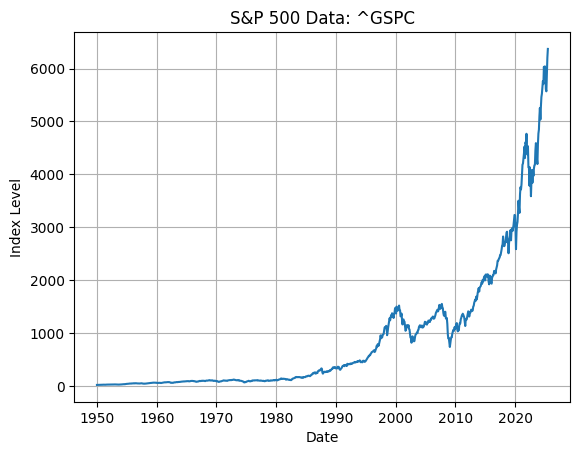

In [9]:
plt.plot(sp500)
plt.title('S&P 500 Data: ^GSPC')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.grid(True)

## Task 2: Find Macroeconomic Data

Now that our S&P 500 data has been secured as our response variable, I will now find all of the macroeconomic features that I want to compare against each other in order to fulfill the research question I originally posed. Not only do I want to quantify the effects of macroeconomic factors on the stock market, but I want to evaluate which of these features has the most impact, either positive or negative. To meet that goal, I have read through the **fredapi** documentation and other articles on impactful macroeconomic factors to find the features that I think best represent the areas that highlight important macroeconomic factors. The list is as follows:

CPI: Consumer Price Index

UNRATE: Unemployment Rate

FEDFUNDS: Federal Funds Rate

GS10: 10 Year Treasury Rate

M2: Money Supply - how much money is in circulation

INDPRO: Industrial Production Index

RSAFS: Retail and Food Service Sales

UMCSENT: University of Michigan Consumer Sentiment Index

HOUST: Housing Starts

MSPUS: Median House Price

TWEXB: US Dollar Strength

NETEXP: Net Exports

In [10]:
start_date="1947-01-01"
macro_series = {
    'CPI': 'CPIAUCSL',
    'UNRATE': 'UNRATE',
    'FEDFUNDS': 'FEDFUNDS',
    'GS10': 'GS10',
    'M2': 'M2SL',
    'INDPRO': 'INDPRO',
    'RSAFS': 'RSAFS',
    'UMCSENT': 'UMCSENT',
    'HOUST': 'HOUST',
    'MSPUS': 'MSPUS',
    'TWEXB': 'TWEXB',
    'NETEXP': 'NETEXP'
}

fred_df = pd.DataFrame()

# Add each of the macroeconomic features to the dataframe
for key, value in macro_series.items():
    data = fred.get_series(value)
    fred_df[key] = data

# Resample to get end of month values
fred_df = fred_df.resample('ME').last().ffill()

fred_df

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,RSAFS,UMCSENT,HOUST,MSPUS,TWEXB,NETEXP
1947-01-31,21.480,NaN,NaN,NaN,NaN,13.6554,NaN,NaN,NaN,NaN,NaN,10.875
1947-02-28,21.620,NaN,NaN,NaN,NaN,13.7361,NaN,NaN,NaN,NaN,NaN,10.875
1947-03-31,22.000,NaN,NaN,NaN,NaN,13.8167,NaN,NaN,NaN,NaN,NaN,10.875
1947-04-30,22.000,NaN,NaN,NaN,NaN,13.7092,NaN,NaN,NaN,NaN,NaN,11.294
1947-05-31,21.950,NaN,NaN,NaN,NaN,13.7629,NaN,NaN,NaN,NaN,NaN,11.294
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28,319.775,4.1,4.33,4.45,21584.1,103.9397,711757.0,64.7,1490.0,423100.0,128.6539,-1245.141
2025-03-31,319.615,4.2,4.33,4.28,21656.9,103.6682,722572.0,57.0,1355.0,423100.0,128.6539,-1245.141
2025-04-30,320.321,4.2,4.33,4.28,21804.5,103.6912,721789.0,52.2,1398.0,410800.0,128.6539,-872.384
2025-05-31,320.580,4.2,4.33,4.42,21883.6,103.6602,715541.0,52.2,1263.0,410800.0,128.6539,-872.384


In [11]:
fred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 1947-01-31 to 2025-06-30
Freq: ME
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPI       942 non-null    float64
 1   UNRATE    930 non-null    float64
 2   FEDFUNDS  852 non-null    float64
 3   GS10      867 non-null    float64
 4   M2        798 non-null    float64
 5   INDPRO    942 non-null    float64
 6   RSAFS     402 non-null    float64
 7   UMCSENT   872 non-null    float64
 8   HOUST     798 non-null    float64
 9   MSPUS     750 non-null    float64
 10  TWEXB     365 non-null    float64
 11  NETEXP    942 non-null    float64
dtypes: float64(12)
memory usage: 95.7 KB


### Analyze Missing Values

TWEXB       577
RSAFS       540
MSPUS       192
M2          144
HOUST       144
FEDFUNDS     90
GS10         75
UMCSENT      70
UNRATE       12
CPI           0
INDPRO        0
NETEXP        0
dtype: int64


Text(0.5, 1.0, 'Missing Macroeconomic Data by Feature')

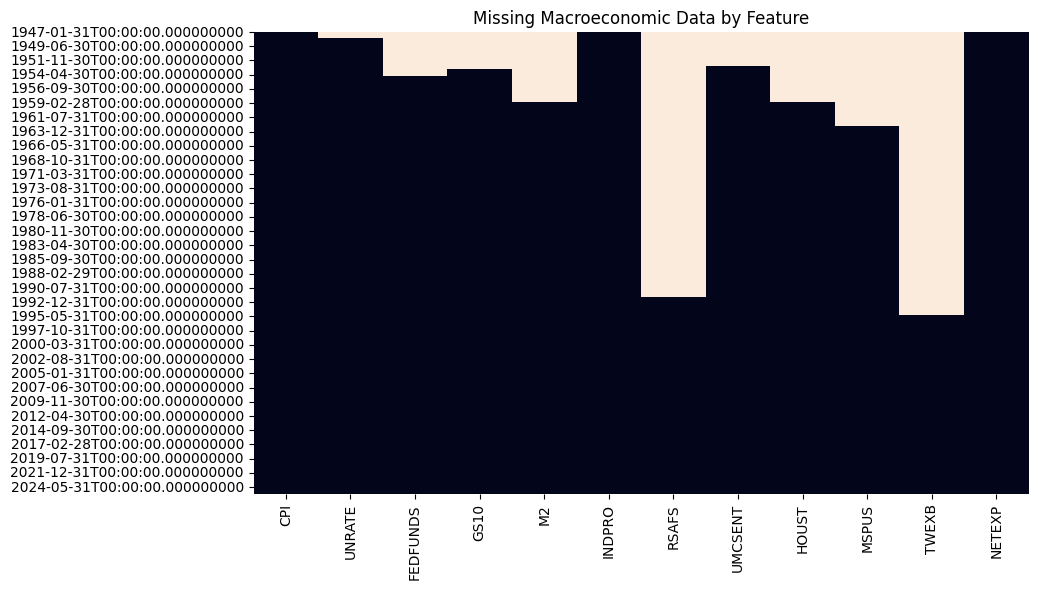

In [12]:
# Count missing values
missing = fred_df.isnull().sum().sort_values(ascending=False)
print(missing)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(fred_df.isnull(), cbar=False)
plt.title("Missing Macroeconomic Data by Feature")

After analyzing our initial dataframe, I can see that the features with the most missing values are "RSAFS: Retail and Food Service Sales" and "TWEXB: US Dollar Strength". Because these features have such limited amounts of data, I would rather choose to drop them from our dataframe entirely such that we can retain as much of the data as possible. Despite how much I believe they can contribute meaningful value to the analysis of macroeconomic impacts on the stock market, I would rather drop them for the sake of not having to impute the data with proper values. For the rest of the missing data, most of these features are missing data at the beginning of their series. As a result, I plan to drop all null/NA values until I get the data to a point where all of the features have a value that I can forward fill if necessary.

In [13]:
fred_df.drop(columns=['TWEXB', 'RSAFS'], inplace=True)
fred_df.dropna(inplace=True)
fred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 1963-01-31 to 2025-06-30
Freq: ME
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPI       750 non-null    float64
 1   UNRATE    750 non-null    float64
 2   FEDFUNDS  750 non-null    float64
 3   GS10      750 non-null    float64
 4   M2        750 non-null    float64
 5   INDPRO    750 non-null    float64
 6   UMCSENT   750 non-null    float64
 7   HOUST     750 non-null    float64
 8   MSPUS     750 non-null    float64
 9   NETEXP    750 non-null    float64
dtypes: float64(10)
memory usage: 64.5 KB


In [14]:
fred_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CPI,750.0,147.333312,82.591165,30.440,66.0500,147.15000,217.33275,321.5000
UNRATE,750.0,5.871600,1.731922,3.400,4.6000,5.60000,7.00000,14.8000
FEDFUNDS,750.0,4.899920,3.680550,0.050,1.9100,4.85500,6.58000,19.1000
GS10,750.0,5.866573,2.962599,0.620,3.8725,5.61000,7.58000,15.3200
M2,750.0,5888.623733,5949.748390,365.200,1336.3750,3479.80000,8485.57500,22020.8000
INDPRO,750.0,70.788901,25.257246,25.913,48.3068,67.67055,96.92460,104.1038
UMCSENT,750.0,85.030800,13.040079,50.000,75.4000,88.55000,94.70000,112.0000
HOUST,750.0,1434.421333,388.287736,478.000,1198.5000,1460.00000,1656.00000,2494.0000
MSPUS,750.0,158201.200000,117653.169938,17800.000,56100.0000,129850.00000,236400.00000,442600.0000
NETEXP,750.0,-282.616672,306.705374,-1245.141,-530.7510,-109.16550,-14.75000,21.5820


## Task 3: Explore the Features (EDA)

Now that we have our feature dataframe all tidy, I will now perform EDA on the features to see if we can extract and preliminary analysis about the data. Below, I will start by showing the trends of each feature over time.

### Graph Macroeconomic Features

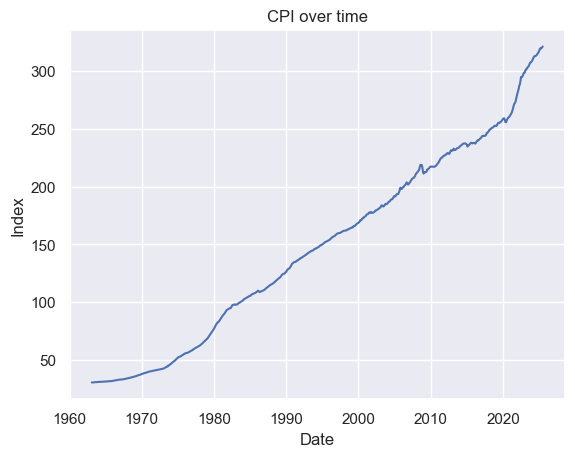

In [34]:
# Examine CPI trends
sns.lineplot(fred_df['CPI'])
plt.title('CPI over time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)

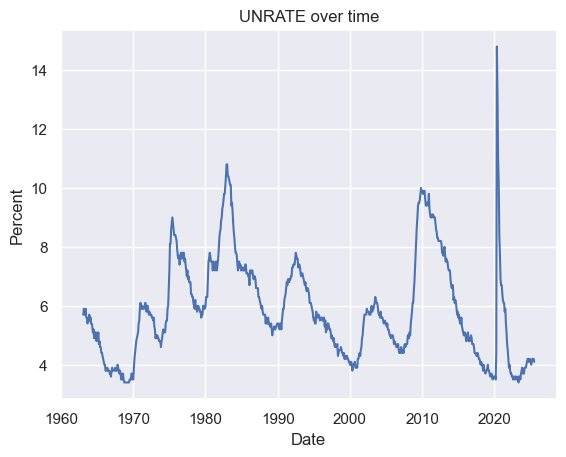

In [35]:
# Examine unemployment rate trends
sns.lineplot(fred_df['UNRATE'])
plt.title('UNRATE over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

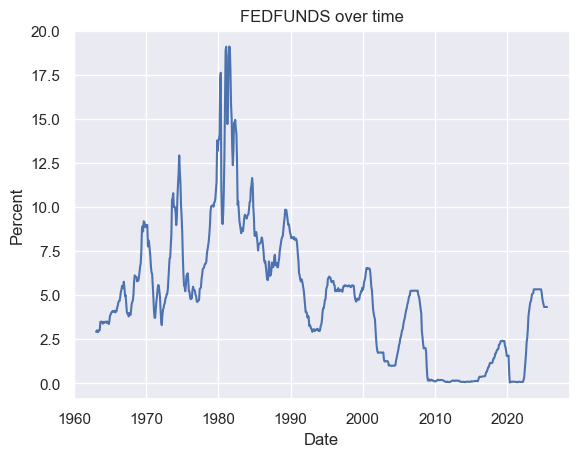

In [36]:
# Examine federal funds rate trends
sns.lineplot(fred_df['FEDFUNDS'])
plt.title('FEDFUNDS over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

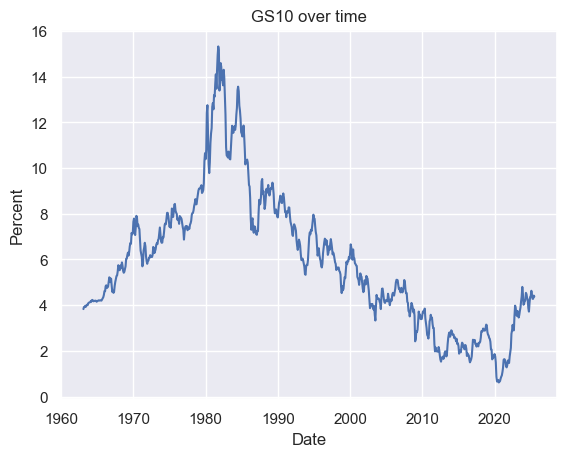

In [37]:
# Examine GS10 trends
sns.lineplot(fred_df['GS10'])
plt.title('GS10 over time')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.grid(True)

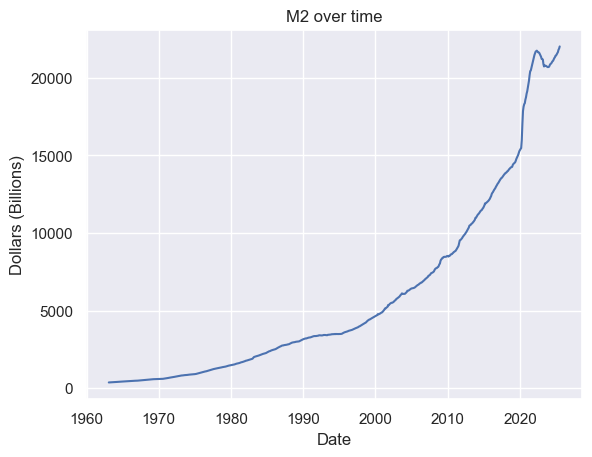

In [39]:
# Examine M2 trends
sns.lineplot(fred_df['M2'])
plt.title('M2 over time')
plt.xlabel('Date')
plt.ylabel('Dollars (Billions)')
plt.grid(True)

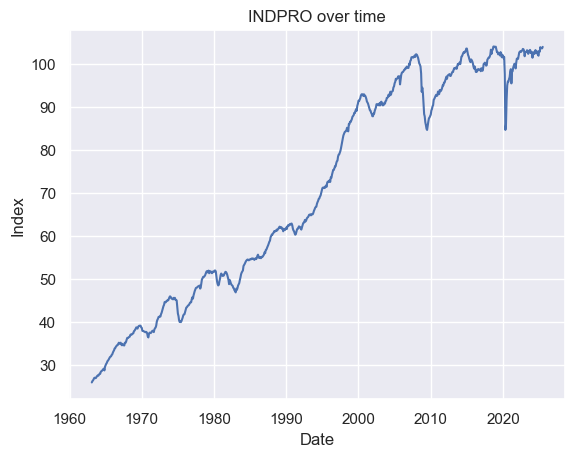

In [40]:
# Examine INDPRO trends
sns.lineplot(fred_df['INDPRO'])
plt.title('INDPRO over time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)

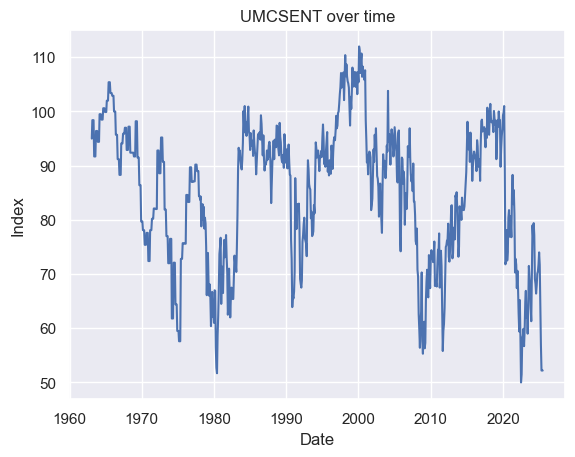

In [42]:
# Examine consumer sentiment trends
sns.lineplot(fred_df['UMCSENT'])
plt.title('UMCSENT over time')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)

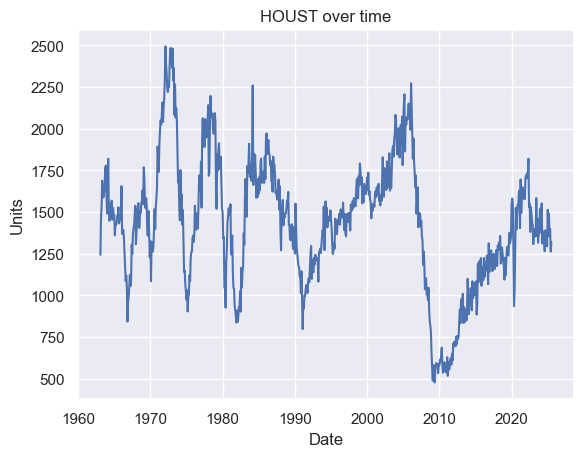

In [44]:
# Examine HOUST trends
sns.lineplot(fred_df['HOUST'])
plt.title('HOUST over time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.grid(True)

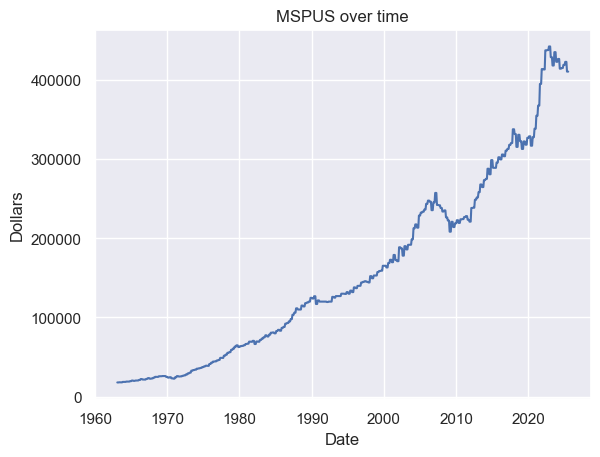

In [45]:
# Examine MSPUS trends
sns.lineplot(fred_df['MSPUS'])
plt.title('MSPUS over time')
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.grid(True)

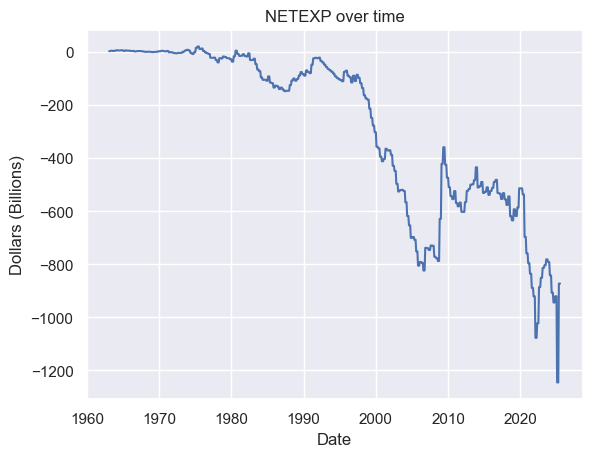

In [46]:
# Examine NETEXP trends
sns.lineplot(fred_df['NETEXP'])
plt.title('NETEXP over time')
plt.xlabel('Date')
plt.ylabel('Dollars (Billions)')
plt.grid(True)

Based on the plots of the features, the only outlier in the graphs would be when the unemployment rate spiked right around 2020. This is best explained by the COVID-19 pandemic, and I will keep an eye on it to make sure that this irregularity in what was going on in the world doesn't skew the bias of this feature too much. However, if we compare this to our S&P 500 data, we also see that the stock market was impacted by COVID-19, meaning that maybe there is some sort of inverse relationship between unemployment rates and the stock market value. It could still be the case that since unemployment rates grew because of COVID, this is what adversely affected the markets.

### Outlier Check

In [50]:
Q1 = fred_df.quantile(0.25)
Q3 = fred_df.quantile(0.75)
IQR = Q3 - Q1

# Find outliers the IQR formula
outliers = ((fred_df < (Q1 - 1.5 * IQR)) | (fred_df > (Q3 + 1.5 * IQR)))

# Count number of outliers per feature
outlier_counts = outliers.sum()

print(outlier_counts)

CPI          0
UNRATE       5
FEDFUNDS    23
GS10        20
M2          54
INDPRO       0
UMCSENT      0
HOUST       12
MSPUS        0
NETEXP       0
dtype: int64


## Task 3: Join the Datasets

In [54]:
# Ensure both indexes are datetime and have same alignment
sp500.index = pd.to_datetime(sp500.index).to_period('M').to_timestamp(how='end')
fred_df.index = pd.to_datetime(fred_df.index).to_period('M').to_timestamp(how='end')

# Flatten the index from multi-level index to single index
sp500.columns = sp500.columns.get_level_values(0)

# Join the two dataframes
combined_df = fred_df.join(sp500, how='inner')

print(combined_df.info())
combined_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 1963-01-31 23:59:59.999999999 to 2025-06-30 23:59:59.999999999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CPI          750 non-null    float64
 1   UNRATE       750 non-null    float64
 2   FEDFUNDS     750 non-null    float64
 3   GS10         750 non-null    float64
 4   M2           750 non-null    float64
 5   INDPRO       750 non-null    float64
 6   UMCSENT      750 non-null    float64
 7   HOUST        750 non-null    float64
 8   MSPUS        750 non-null    float64
 9   NETEXP       750 non-null    float64
 10  SP500_Close  750 non-null    float64
dtypes: float64(11)
memory usage: 70.3 KB
None


,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,UMCSENT,HOUST,MSPUS,NETEXP,SP500_Close
1963-01-31 23:59:59.999999999,30.440,5.7,2.92,3.83,365.2,25.9130,95.0,1244.0,17800.0,3.976,66.199997
1963-02-28 23:59:59.999999999,30.480,5.9,3.00,3.92,367.9,26.2088,98.4,1456.0,17800.0,3.976,64.290001
1963-03-31 23:59:59.999999999,30.510,5.7,2.98,3.93,370.7,26.3700,98.4,1534.0,17800.0,3.976,66.570000
1963-04-30 23:59:59.999999999,30.480,5.7,2.90,3.97,373.3,26.6120,98.4,1689.0,18000.0,5.558,69.800003
1963-05-31 23:59:59.999999999,30.510,5.9,3.00,3.93,376.1,26.9345,91.7,1641.0,18000.0,5.558,70.800003
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-28 23:59:59.999999999,319.775,4.1,4.33,4.45,21584.1,103.9397,64.7,1490.0,423100.0,-1245.141,5954.500000
2025-03-31 23:59:59.999999999,319.615,4.2,4.33,4.28,21656.9,103.6682,57.0,1355.0,423100.0,-1245.141,5611.850098
2025-04-30 23:59:59.999999999,320.321,4.2,4.33,4.28,21804.5,103.6912,52.2,1398.0,410800.0,-872.384,5569.060059
2025-05-31 23:59:59.999999999,320.580,4.2,4.33,4.42,21883.6,103.6602,52.2,1263.0,410800.0,-872.384,5911.689941


**TODO**: I want to put this section in the S&P 500 section. Remove SP500_Close

**NOTE**: Because the problem I am trying to solve involves trying to predict future stock market movement/trends based on current macroeconomic data, I have read that it is wise to lag the data provided by 'fred_df' since that will simulate us predicting into the future. This is the same as saying at this present moment, let's call it time *t*, I want to be able to predict the S&P 500 long term movement, *t+1*. Therefore, I will shift our S&P 500 data up 1 row to simulate these predictions. At the same time, I will also make my target variable to be percent change from the current S&P 500 value. This is because I still want to assume some sort of stationarity with our data, and I want to make my models more statistically sound.

In [60]:
combined_df['SP500_Shifted_Pct'] = combined_df['SP500_Close'].pct_change().shift(-1)
combined_df.tail()

,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,UMCSENT,HOUST,MSPUS,NETEXP,SP500_Close,SP500_Shifted,SP500_Shifted_Pct
2025-02-28 23:59:59.999999999,319.775,4.1,4.33,4.45,21584.1,103.9397,64.7,1490.0,423100.0,-1245.141,5954.500000,-0.057545,-0.057545
2025-03-31 23:59:59.999999999,319.615,4.2,4.33,4.28,21656.9,103.6682,57.0,1355.0,423100.0,-1245.141,5611.850098,-0.007625,-0.007625
2025-04-30 23:59:59.999999999,320.321,4.2,4.33,4.28,21804.5,103.6912,52.2,1398.0,410800.0,-872.384,5569.060059,0.061524,0.061524
2025-05-31 23:59:59.999999999,320.580,4.2,4.33,4.42,21883.6,103.6602,52.2,1263.0,410800.0,-872.384,5911.689941,0.049607,0.049607
2025-06-30 23:59:59.999999999,321.500,4.1,4.33,4.38,22020.8,104.0071,52.2,1321.0,410800.0,-872.384,6204.950195,NaN,NaN


In [59]:
#TODO: Add lags + add section explaining lags

## Task 4: Clean the Data

In [19]:
combined_df.dropna(inplace=True)
print(combined_df.info())
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 1963-01-31 23:59:59.999999999 to 2025-06-30 23:59:59.999999999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CPI          750 non-null    float64
 1   UNRATE       750 non-null    float64
 2   FEDFUNDS     750 non-null    float64
 3   GS10         750 non-null    float64
 4   M2           750 non-null    float64
 5   INDPRO       750 non-null    float64
 6   UMCSENT      750 non-null    float64
 7   HOUST        750 non-null    float64
 8   MSPUS        750 non-null    float64
 9   NETEXP       750 non-null    float64
 10  SP500_Close  750 non-null    float64
dtypes: float64(11)
memory usage: 70.3 KB
None


,CPI,UNRATE,FEDFUNDS,GS10,M2,INDPRO,UMCSENT,HOUST,MSPUS,NETEXP,SP500_Close
1963-01-31 23:59:59.999999999,30.44,5.7,2.92,3.83,365.2,25.9130,95.0,1244.0,17800.0,3.976,66.199997
1963-02-28 23:59:59.999999999,30.48,5.9,3.00,3.92,367.9,26.2088,98.4,1456.0,17800.0,3.976,64.290001
1963-03-31 23:59:59.999999999,30.51,5.7,2.98,3.93,370.7,26.3700,98.4,1534.0,17800.0,3.976,66.570000
1963-04-30 23:59:59.999999999,30.48,5.7,2.90,3.97,373.3,26.6120,98.4,1689.0,18000.0,5.558,69.800003
1963-05-31 23:59:59.999999999,30.51,5.9,3.00,3.93,376.1,26.9345,91.7,1641.0,18000.0,5.558,70.800003


There should be no duplicates (because this is a time series), but just in case there was something wrong with the sampling or the API, I will attempt to drop any duplicates.

In [20]:
combined_df.drop_duplicates(inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 1963-01-31 23:59:59.999999999 to 2025-06-30 23:59:59.999999999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CPI          750 non-null    float64
 1   UNRATE       750 non-null    float64
 2   FEDFUNDS     750 non-null    float64
 3   GS10         750 non-null    float64
 4   M2           750 non-null    float64
 5   INDPRO       750 non-null    float64
 6   UMCSENT      750 non-null    float64
 7   HOUST        750 non-null    float64
 8   MSPUS        750 non-null    float64
 9   NETEXP       750 non-null    float64
 10  SP500_Close  750 non-null    float64
dtypes: float64(11)
memory usage: 70.3 KB


Based on the results, we did not drop any duplicates as the row count stayed the same.

## Task 5: Modeling

In [21]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline